*Importing* *Libraries*



In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from google.colab import files
from sklearn.preprocessing import LabelEncoder
from mlxtend.plotting import plot_decision_regions
from seaborn import load_dataset, pairplot
from sklearn.linear_model import Perceptron
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score, confusion_matrix
from mlxtend.plotting import category_scatter
from sklearn import svm
from sklearn.datasets import make_classification, make_circles
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler    
from matplotlib.colors import ListedColormap  
from mlxtend.plotting import plot_confusion_matrix
from sklearn.preprocessing import MultiLabelBinarizer

%matplotlib inline

*Importing* *Data*

In [6]:
# upload datasets
file1 = files.upload()
file2 = files.upload()

Saving DUMD_train.csv to DUMD_train.csv


Saving DUMD_test.csv to DUMD_test.csv


In [63]:
#read datasets
DUMD = pd.read_csv('DUMD_train.csv')
DUMD_test = pd.read_csv('DUMD_test.csv')

In [64]:
DUMD.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,Very Low
1,0.08,0.08,0.10,0.24,0.90,High
2,0.10,0.10,0.15,0.65,0.30,Medium
3,0.08,0.08,0.08,0.98,0.24,Low
4,0.09,0.15,0.40,0.10,0.66,Medium
5,0.10,0.10,0.43,0.29,0.56,Medium
6,0.20,0.14,0.35,0.72,0.25,Low
7,0.00,0.00,0.50,0.20,0.85,High
8,0.18,0.18,0.55,0.30,0.81,High
9,0.06,0.06,0.51,0.41,0.30,Low


In [65]:
DUMD.shape

(323, 6)

In [66]:
DUMD.dtypes

STG    float64
SCG    float64
STR    float64
LPR    float64
PEG    float64
UNS     object
dtype: object

*Converting* *Categorical* *Class* *Labels* *to* *Numerical* *Values* 

In [67]:
DUMD['UNS'].unique()

array(['Very Low', 'High', 'Medium', 'Low'], dtype=object)

In [68]:
DUMD['UNS'].value_counts()

Low         103
Medium      100
High         81
Very Low     39
Name: UNS, dtype: int64

In [69]:
encodedOutput_UNS = LabelEncoder()
Y_TRAIN= encodedOutput_UNS.fit_transform(DUMD['UNS'])
DUMD['UNS']= Y_TRAIN

In [70]:
DUMD.head()

,STG,SCG,STR,LPR,PEG,UNS
0,0.00,0.00,0.00,0.00,0.00,3
1,0.08,0.08,0.10,0.24,0.90,0
2,0.10,0.10,0.15,0.65,0.30,2
3,0.08,0.08,0.08,0.98,0.24,1
4,0.09,0.15,0.40,0.10,0.66,2


In [71]:
encodedOutputUNS = LabelEncoder()
Y_TEST = encodedOutput_UNS.fit_transform(DUMD_test['UNS'])
DUMD_test['UNS']= Y_TEST

In [72]:
DUMD_test.head(10)

,STG,SCG,STR,LPR,PEG,UNS
0,0.420,0.290,0.140,0.03,0.68,2
1,0.100,0.100,0.520,0.78,0.34,2
2,0.510,0.255,0.550,0.17,0.64,2
3,0.250,0.540,0.310,0.25,0.08,3
4,0.258,0.250,0.295,0.33,0.77,0
5,0.460,0.200,0.760,0.95,0.65,0
6,0.190,0.380,0.380,0.49,0.45,2
7,0.210,0.780,0.420,0.32,0.84,0
8,0.270,0.310,0.320,0.41,0.28,1
9,0.410,0.110,0.210,0.44,0.57,2


*Choose* *features* & *Apply* *Models*

In [73]:
data=DUMD.iloc[:,:-1]
target=DUMD.UNS
X = np.array(data)
Y= np.array(target)
Y

array([3, 0, 2, 1, 2, 2, 1, 0, 0, 1, 2, 0, 3, 1, 1, 2, 1, 2, 2, 1, 1, 0,
       3, 1, 0, 2, 1, 1, 0, 1, 1, 1, 3, 0, 2, 2, 3, 2, 2, 0, 1, 1, 1, 2,
       0, 1, 2, 2, 1, 3, 3, 2, 0, 3, 0, 3, 1, 1, 1, 1, 2, 2, 1, 1, 3, 1,
       2, 2, 2, 3, 0, 1, 1, 2, 1, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 0, 0, 2,
       2, 3, 2, 0, 1, 2, 0, 0, 1, 1, 2, 1, 2, 3, 0, 2, 2, 1, 1, 2, 1, 3,
       2, 2, 1, 3, 1, 0, 0, 1, 2, 2, 2, 0, 2, 2, 2, 0, 0, 3, 0, 2, 0, 1,
       0, 1, 2, 0, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 2, 0,
       2, 0, 2, 1, 1, 2, 3, 3, 2, 3, 1, 0, 2, 2, 0, 2, 2, 0, 2, 2, 1, 0,
       1, 1, 2, 2, 1, 2, 0, 2, 1, 1, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 2, 1,
       2, 2, 2, 1, 0, 2, 2, 0, 3, 1, 0, 0, 1, 2, 1, 0, 3, 2, 3, 0, 2, 0,
       3, 0, 3, 1, 0, 1, 1, 1, 2, 1, 2, 3, 1, 2, 0, 1, 2, 0, 2, 2, 3, 0,
       3, 3, 2, 2, 0, 3, 2, 3, 0, 3, 0, 3, 1, 0, 0, 1, 0, 1, 2, 1, 2, 0,
       3, 0, 3, 0, 2, 0, 1, 0, 0, 2, 0, 3, 1, 2, 1, 3, 1, 2, 1, 2, 0, 1,
       3, 1, 2, 1, 2, 1, 1, 1, 2, 2, 0, 1, 2, 0, 0,



*   Using Correlation Coefficient to choose the best features
   



Text(0.5, 1.0, 'Correlation Matrix')

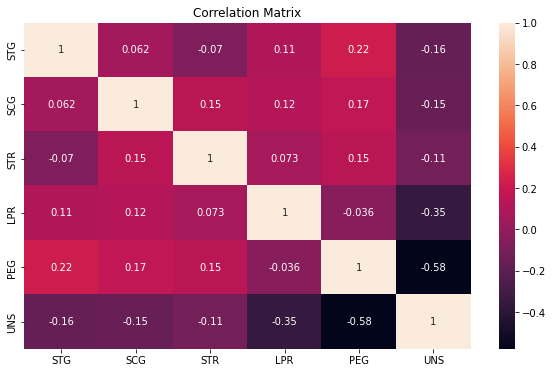

In [74]:
cor = DUMD.corr()

plt.figure(figsize= (10,6))
sns.heatmap(cor, annot = True)
plt.title("Correlation Matrix")


- Using f_classif : ANOVA F-value between label/feature for classification tasks.

['LPR' 'PEG']
accuracies :[  7.98709716   5.92669075   5.35222489  15.02514254 633.67829829]


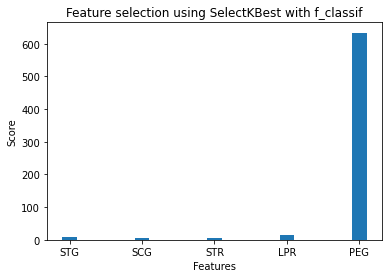

In [75]:
from sklearn.feature_selection import SelectKBest,f_classif
featureSelection= SelectKBest(f_classif, k=2).fit(data, target)
X_train = featureSelection.transform(data)
print(featureSelection.get_feature_names_out())
featureSelection.scores_
col_names =data.columns
print(f"accuracies :{featureSelection.scores_}")
plt.bar(col_names , featureSelection.scores_, width=0.2)
plt.title("Feature selection using SelectKBest with f_classif")
plt.xlabel("Features")
plt.ylabel("Score")
plt.show()

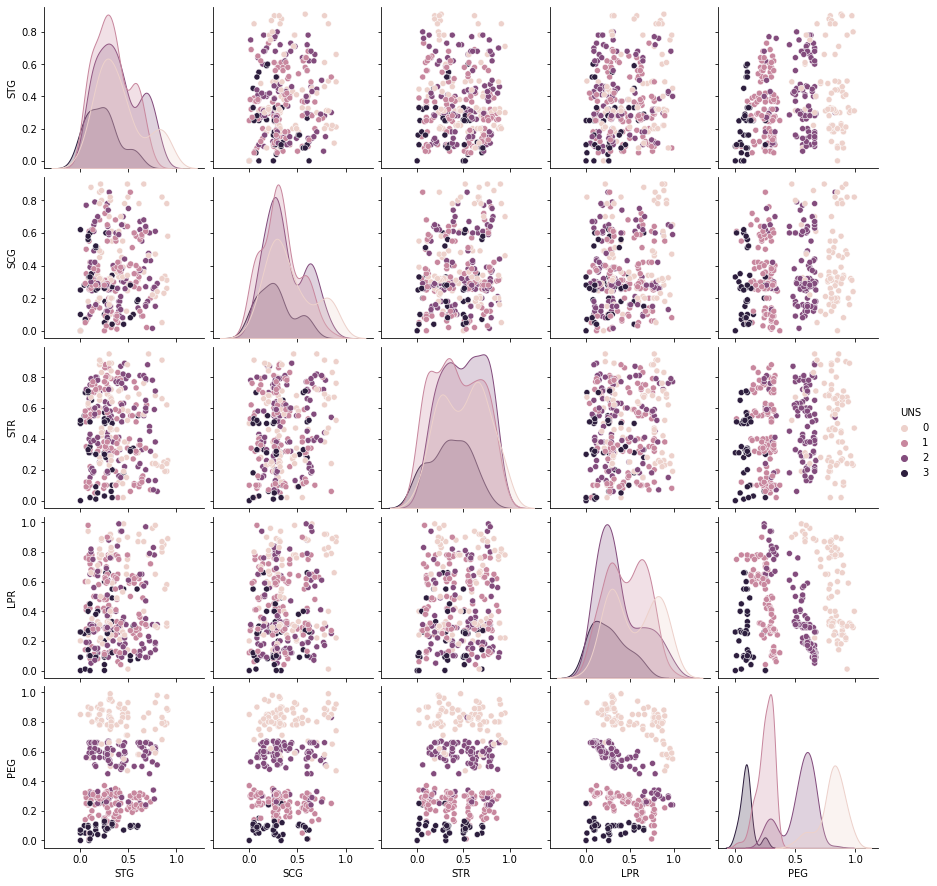

In [76]:
pairplot(DUMD, hue='UNS')
plt.show()

***Plotting*** ***The*** ***Data***

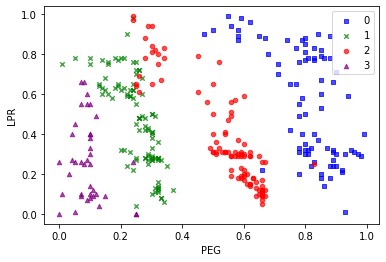

In [77]:
DUMD['UNS'] = np.where(DUMD['UNS'] == 'Very Low', 'very_low', DUMD['UNS'])
figure_1 = category_scatter(x='PEG', y='LPR', label_col='UNS',
                       data=DUMD, legend_loc='upper right')
plt.xlabel('PEG')
plt.ylabel('LPR')
plt.show()

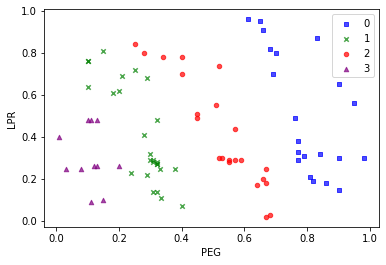

In [78]:
DUMD_test['UNS'] = np.where(DUMD_test['UNS'] == 'Very Low', 'very_low', DUMD_test['UNS'])
figure_2 = category_scatter(x='PEG', y='LPR', label_col='UNS',
                       data=DUMD_test, legend_loc='upper right')
plt.xlabel('PEG')
plt.ylabel('LPR')
plt.show()

# ***SVM***   

In [79]:
data_train=pd.DataFrame({'LPR':DUMD['LPR'],'PEG':DUMD['PEG']})
target_train=pd.DataFrame({'UNS':DUMD['UNS']})
X_train = data_train
Y_train= target_train

In [80]:
data_test=pd.DataFrame({'LPR':DUMD_test['LPR'],'PEG':DUMD_test['PEG']})
target_test=pd.DataFrame({'UNS':DUMD_test['UNS']})
X_test = data_test
Y_test= target_test

In [81]:
SVM_model = svm.SVC(kernel='linear', probability=True)
SVM_model.fit(X_train, Y_train)
y_predict_svm = SVM_model.predict(X_test)
evaluation_svm = accuracy_score(Y_test, y_predict_svm)

evaluation_svm

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.9125


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  2 20  0]
 [ 0  5  0  6]]


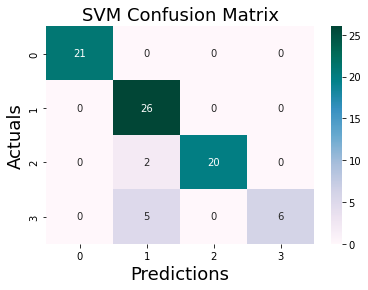

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.79      1.00      0.88        26
           2       1.00      0.91      0.95        22
           3       1.00      0.55      0.71        11

    accuracy                           0.91        80
   macro avg       0.95      0.86      0.88        80
weighted avg       0.93      0.91      0.91        80



In [82]:
print('\nConfusion Matrix:\n')
print(confusion_matrix(Y_test, y_predict_svm))
ax = sns.heatmap(confusion_matrix(Y_test,y_predict_svm ), annot=True, cmap='PuBuGn')
plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('SVM Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(Y_test,y_predict_svm))


In [83]:
Train_Set = DUMD.iloc[:,3:]
Test_Set = DUMD_test.iloc[:,3:]

X_train0 = Train_Set
X_train1 = Train_Set
X_train2 = Train_Set
X_train3 = Train_Set

X_test0 = Test_Set
X_test1 = Test_Set
X_test2 = Test_Set
X_test3 = Test_Set

X_train0 = X_train0.loc[X_train0['UNS'] == 0]
X_train1 = X_train1.loc[X_train1['UNS']==1]
X_train2 = X_train2.loc[X_train2['UNS']==2]
X_train3 = X_train3.loc[X_train3['UNS']==3]

X_test0 = X_test0.loc[X_test0['UNS']=='0']
X_test1 = X_test1.loc[X_test1['UNS']=='1']
X_test2 = X_test2.loc[X_test2['UNS']=='2']
X_test3 = X_test3.loc[X_test3['UNS']=='3']

Train_Set

,LPR,PEG,UNS
0,0.00,0.00,3
1,0.24,0.90,0
2,0.65,0.30,2
3,0.98,0.24,1
4,0.10,0.66,2
...,...,...,...
318,0.32,0.89,0
319,0.83,0.83,0
320,0.13,0.32,1
321,0.57,0.57,2


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


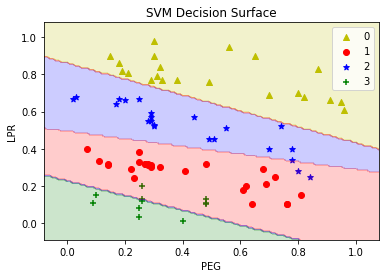

In [84]:

plt.scatter(X_test0.iloc[:,0], X_test0.iloc[:,1], c='y', marker='^', label=0)
plt.scatter(X_test1.iloc[:,0], X_test1.iloc[:,1], c='r', marker='o', label=1)
plt.scatter(X_test2.iloc[:,0], X_test2.iloc[:,1], c='b', marker='*', label=2)
plt.scatter(X_test3.iloc[:,0], X_test3.iloc[:,1], c='g', marker='+', label=3)

Xaxis_Yaxis = X_test.values
XA, YA = np.meshgrid(np.arange(start = Xaxis_Yaxis[: ,0].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01),
                    np.arange(start = Xaxis_Yaxis[: ,1].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01))
        
plt.contourf(XA, YA, SVM_model.predict(np.array([XA.ravel(), YA.ravel()]).T).reshape(XA.shape),
              alpha = 0.2, cmap =  ListedColormap(['y','r','b','g']))
plt.xlim(XA.min(), XA.max())
plt.ylim(YA.min(), YA.max())
plt.title('SVM Decision Surface')
plt.legend()
plt.xlabel('PEG')
plt.ylabel('LPR')
plt.show()


*   ***Perceptron***





In [85]:
Percep_model = Perceptron(eta0=0.1, max_iter=200)
Percep_model.fit(X_train, Y_train)
y_predict_Percep=Percep_model.predict(X_test)
evaluation_precep=accuracy_score(Y_test, y_predict_Percep)

evaluation_precep

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.75


Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 5  7 10  0]
 [ 0  8  0  3]]


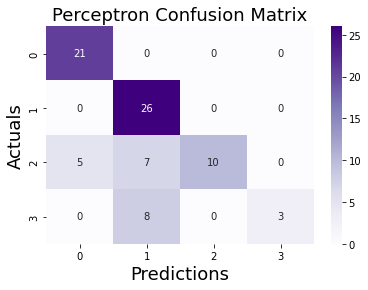

              precision    recall  f1-score   support

           0       0.81      1.00      0.89        21
           1       0.63      1.00      0.78        26
           2       1.00      0.45      0.62        22
           3       1.00      0.27      0.43        11

    accuracy                           0.75        80
   macro avg       0.86      0.68      0.68        80
weighted avg       0.83      0.75      0.72        80



In [86]:
print('\nConfusion Matrix:\n')
print(confusion_matrix(Y_test,y_predict_Percep ))
ax = sns.heatmap(confusion_matrix(Y_test,y_predict_Percep ), annot=True, cmap='Purples')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Perceptron Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(Y_test,y_predict_Percep))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but Perceptron was fitted with feature names
  "X does not have valid feature names, but"


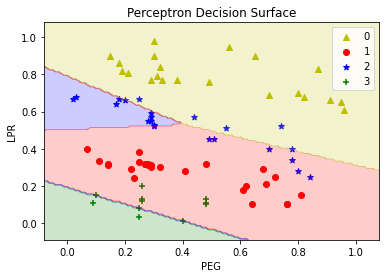

In [87]:
plt.scatter(X_test0.iloc[:,0], X_test0.iloc[:,1], c='y', marker='^', label=0)
plt.scatter(X_test1.iloc[:,0], X_test1.iloc[:,1], c='r', marker='o', label=1)
plt.scatter(X_test2.iloc[:,0], X_test2.iloc[:,1], c='b', marker='*', label=2)
plt.scatter(X_test3.iloc[:,0], X_test3.iloc[:,1], c='g', marker='+', label=3)

Xaxis_Yaxis = X_test.values
XA, YA = np.meshgrid(np.arange(start = Xaxis_Yaxis[: ,0].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01),
                    np.arange(start = Xaxis_Yaxis[: ,1].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01))
        
plt.contourf(XA, YA, Percep_model.predict(np.array([XA.ravel(), YA.ravel()]).T).reshape(XA.shape),
              alpha = 0.2, cmap =  ListedColormap(['y','r','b','g']))
plt.xlim(XA.min(), XA.max())
plt.ylim(YA.min(), YA.max())
plt.title('Perceptron Decision Surface')
plt.legend()
plt.xlabel('PEG')
plt.ylabel('LPR')
plt.show()

## plotting function

In [88]:
def confusion_matrix_binary_classes(y_test,y_pred):
  print(confusion_matrix(y_test, y_pred))
  ax = sns.heatmap(confusion_matrix(y_test,y_pred ), annot=True, cmap='PuBuGn')
  plt.xlabel('Predictions', fontsize=18)
  plt.ylabel('Actuals', fontsize=18)
  plt.title('SVM Confusion Matrix', fontsize=18)
  plt.show()
  print(classification_report(y_test,y_pred))

In [89]:
def plot_binary_clasifier(X_,y,model):
  if isinstance(X_, pd.DataFrame):
    X = X_.to_numpy()
  else:
    X=X_
  plt.scatter(X[y == 0,0], X[y == 0,1], c='r', marker='o', label=0)
  plt.scatter(X[y == 1,0], X[y == 1,1], c='b', marker='^', label=1)

  x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
  y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
  xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01), np.arange(y_min, y_max, 0.01))

  z = model.predict(np.c_[xx.ravel(), yy.ravel()])
  Z= z.reshape(xx.shape)
  plt.contourf(xx, yy, Z, alpha=0.5)
  plt.xlabel('PEG')
  plt.ylabel('LPR')
  plt.title('SVM Decision Surface')
  plt.legend()
  plt.show()

In [90]:
def plot_true_false(X_test, y_true, y_pred):
  num_accurate = 0
  x_test_true = []
  x_test_false = []

  for i in range(len(y_true)):
    if y_true[i]==y_pred[i]:
      x_test_true.append(list(X_test[i]))
      num_accurate+=1
    else:
      x_test_false.append(list(X_test[i]))

  print("number of accurate prediction points =", num_accurate)
  print("number of inaccurate prediction points =",len(y_true)- num_accurate)
  print("accuracy =",(num_accurate/len(y_true))*100)

  x_test_true = np.array(x_test_true)
  x_test_false = np.array(x_test_false)


  plt.scatter(x_test_true[:,0], x_test_true[:,1], label='Correct point', marker='o', c='g')
  plt.scatter(x_test_false[:,0], x_test_false[:,1], label='Wrong point', marker='x', c='r')
  Xaxis_Yaxis = np.concatenate((x_test_true, x_test_false), axis=0)
  
  XA, YA = np.meshgrid(np.arange(start = Xaxis_Yaxis[: ,0].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01),
                    np.arange(start = Xaxis_Yaxis[: ,1].min() - 0.1, stop = Xaxis_Yaxis.max() + 0.1, step = 0.01))
  plt.xlim(XA.min(), XA.max())
  plt.ylim(YA.min(), YA.max())
  plt.xlabel('PEG')
  plt.ylabel('LPR')
  plt.title('correct vs wrong prediction')
  plt.legend()
  plt.show()


# ***0VR***

* Binarize y train and y test

In [91]:
mlb = MultiLabelBinarizer()
yb_train = mlb.fit_transform(Y_TRAIN.reshape((-1,1)))
yb_test = mlb.fit_transform(Y_TEST.reshape((-1,1)))

In [92]:
yb1_train = yb_train[:,0]
yb2_train = yb_train[:,1]
yb3_train = yb_train[:,2]
yb4_train = yb_train[:,3]

yb1_test = yb_test[:,0]
yb2_test = yb_test[:,1]
yb3_test = yb_test[:,2]
yb4_test = yb_test[:,3]


In [93]:
def getAccuracy(model, x, y):
  return model.score(x,y)*100

- model 1

Accuracy of clf_1: 100.00%

Confusion Matrix OVR:

[[59  0]
 [ 0 21]]


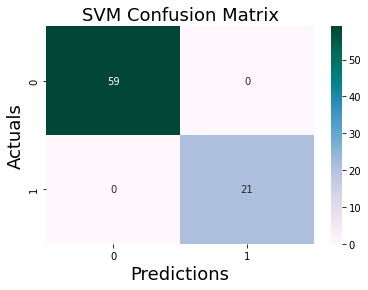

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        59
           1       1.00      1.00      1.00        21

    accuracy                           1.00        80
   macro avg       1.00      1.00      1.00        80
weighted avg       1.00      1.00      1.00        80



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


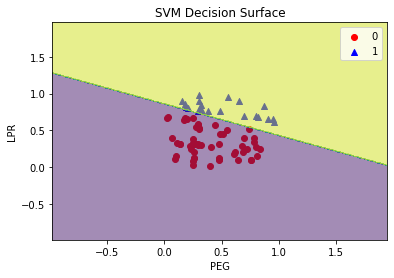

In [94]:
clf_1 = svm.SVC(kernel='linear', probability=True)
clf_1.fit(X_train, yb1_train)
y1_pred = clf_1.predict(X_test)
print('Accuracy of clf_1: {:.2f}%'.format(getAccuracy(clf_1, X_test, yb1_test)))
y1_pred_proba = clf_1.predict_proba(X_test)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb1_test, y1_pred)
plot_binary_clasifier(X_test,yb1_test,clf_1)

- model 2

Accuracy of clf_2: 80.00%

Confusion Matrix OVR:

[[33 21]
 [26  0]]


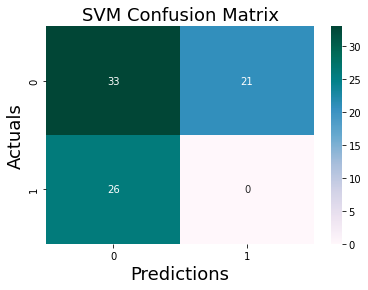

              precision    recall  f1-score   support

           0       0.56      0.61      0.58        54
           1       0.00      0.00      0.00        26

    accuracy                           0.41        80
   macro avg       0.28      0.31      0.29        80
weighted avg       0.38      0.41      0.39        80



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


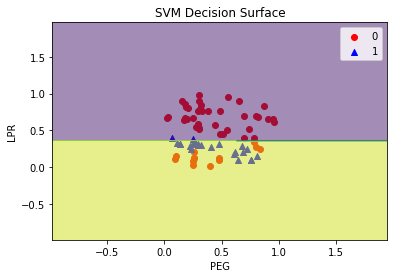

In [95]:
clf_2 = svm.SVC(kernel='linear', probability=True)
clf_2.fit(X_train, yb2_train)
y2_pred = clf_1.predict(X_test)
print('Accuracy of clf_2: {:.2f}%'.format(getAccuracy(clf_2, X_test, yb2_test)))
y2_pred_proba = clf_2.predict_proba(X_test)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb2_test, y2_pred)
plot_binary_clasifier(X_test,yb2_test,clf_2)

- Model 3



Accuracy of clf_3: 72.50%

Confusion Matrix OVR:

[[58  0]
 [22  0]]


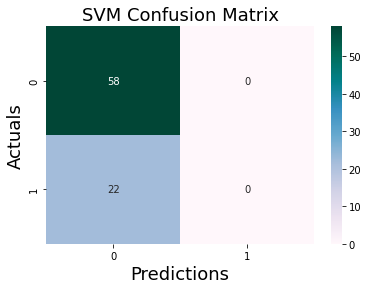

/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWar

              precision    recall  f1-score   support

           0       0.72      1.00      0.84        58
           1       0.00      0.00      0.00        22

    accuracy                           0.73        80
   macro avg       0.36      0.50      0.42        80
weighted avg       0.53      0.72      0.61        80



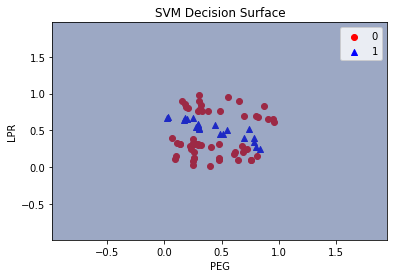

In [96]:
clf_3 = svm.SVC(kernel='linear', probability=True)
clf_3.fit(X_train, yb3_train)
y3_pred = clf_3.predict(X_test)
print('Accuracy of clf_3: {:.2f}%'.format(getAccuracy(clf_3, X_test, yb3_test)))
y3_pred_proba = clf_3.predict_proba(X_test)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb3_test,y3_pred)
plot_binary_clasifier(X_test,yb3_test,clf_3)

- Model 4

Accuracy of clf_4: 93.75%

Confusion Matrix OVR:

[[69  0]
 [ 5  6]]


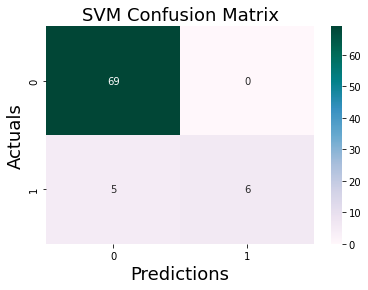

              precision    recall  f1-score   support

           0       0.93      1.00      0.97        69
           1       1.00      0.55      0.71        11

    accuracy                           0.94        80
   macro avg       0.97      0.77      0.84        80
weighted avg       0.94      0.94      0.93        80



/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  "X does not have valid feature names, but"


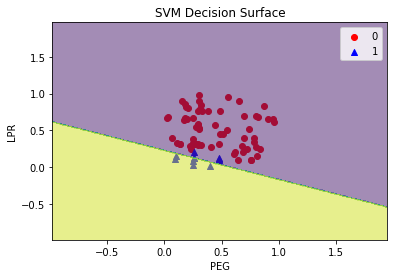

In [97]:
clf_4 = svm.SVC(kernel='linear', probability=True)
clf_4.fit(X_train, yb4_train)
y4_pred = clf_4.predict(X_test)
print('Accuracy of clf_4: {:.2f}%'.format(getAccuracy(clf_4, X_test, yb4_test)))
y4_pred_proba = clf_4.predict_proba(X_test)[:,1].reshape(-1,1)
print('\nConfusion Matrix OVR:\n')
confusion_matrix_binary_classes(yb4_test,y4_pred)
plot_binary_clasifier(X_test,yb4_test,clf_4)

In [98]:
yb_all = np.hstack((y1_pred_proba, y2_pred_proba, y3_pred_proba, y4_pred_proba))
predicted_clases = mlb.classes_[np.argmax(yb_all, axis=1)]
predicted_clases

array([2, 1, 2, 3, 0, 0, 2, 0, 1, 2, 1, 1, 0, 3, 0, 1, 1, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 1, 0, 0, 0, 0, 0, 2, 0, 1, 3, 1, 1, 1, 0, 2, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 2, 1, 1, 1, 1, 0, 0, 1, 3, 2, 3, 1,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1], dtype=object)

the final model accuracy :85.0

Confusion Matrix:

[[21  0  0  0]
 [ 0 23  3  0]
 [ 1  6 15  0]
 [ 0  2  0  9]]


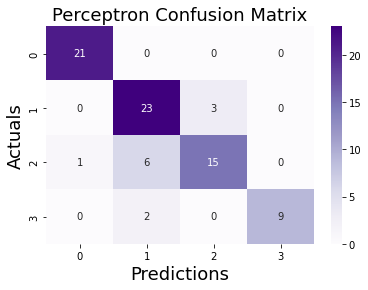

              precision    recall  f1-score   support

           0       0.95      1.00      0.98        21
           1       0.74      0.88      0.81        26
           2       0.83      0.68      0.75        22
           3       1.00      0.82      0.90        11

    accuracy                           0.85        80
   macro avg       0.88      0.85      0.86        80
weighted avg       0.86      0.85      0.85        80



In [99]:
y_true = Y_TEST.squeeze().astype(int)
y_pred =  predicted_clases.squeeze().astype(int)
print(f"the final model accuracy :{accuracy_score(y_true, y_pred)*100}")
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_true,y_pred ))
ax = sns.heatmap(confusion_matrix(y_true,y_pred ), annot=True, cmap='Purples')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Perceptron Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_true,y_pred))

number of accurate prediction points = 68
number of inaccurate prediction points = 12
accuracy = 85.0


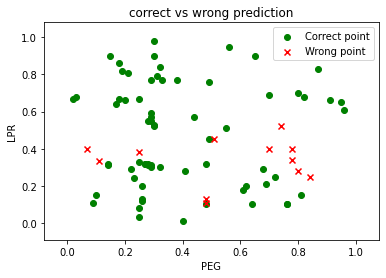

In [100]:
plot_true_false(np.array(X_test),np.array(y_true), np.array(y_pred))

# ***0VO***

inititialize run once

In [101]:
y_train = Y_TRAIN
y_test = Y_TEST
X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


In [102]:
from itertools import combinations
oneVsOneCombinations =list(combinations(range(4),2)) 
oneVsOneCombinations

[(0, 1), (0, 2), (0, 3), (1, 2), (1, 3), (2, 3)]

## Partition labeled oneVsOne data and binarize them for trianing


In [103]:
X1_train, X2_train, X3_train, X4_train, X5_train, X6_train, =[], [], [], [], [], []
y1_train, y2_train, y3_train, y4_train, y5_train, y6_train, =[], [], [], [], [], []

for i in range(len(X_train)):
  # (0,1) if the target labels are 0 or 1 
  if y_train[i] == 0 or y_train[i] == 1:
    X1_train.append(X_train[i])
    y1_train.append(y_train[i])
  
  # (0, 2)
  if y_train[i] == 0 or y_train[i] == 2:
    X2_train.append(X_train[i])
    y2_train.append(y_train[i])
  
  # (0, 3)
  if y_train[i] == 0 or y_train[i] == 3:
    X3_train.append(X_train[i])
    y3_train.append(y_train[i])
      
  # (1, 2)
  if y_train[i] == 1 or y_train[i] == 2:
    X4_train.append(X_train[i])
    y4_train.append(y_train[i])
      
  # (1, 3)
  if y_train[i] == 1 or y_train[i] == 3:
    X5_train.append(X_train[i])
    y5_train.append(y_train[i])
      
  # (2, 3)
  if y_train[i] == 2 or y_train[i] == 3:
    X6_train.append(X_train[i])
    y6_train.append(y_train[i])

# Binarize the y labels
mlb= MultiLabelBinarizer()
y1_train= mlb.fit_transform(np.array(y1_train).reshape((-1,1)))[:,1]
y2_train= mlb.fit_transform(np.array(y2_train).reshape((-1,1)))[:,1]
y3_train= mlb.fit_transform(np.array(y3_train).reshape((-1,1)))[:,1]
y4_train= mlb.fit_transform(np.array(y4_train).reshape((-1,1)))[:,1]
y5_train= mlb.fit_transform(np.array(y5_train).reshape((-1,1)))[:,1]
y6_train= mlb.fit_transform(np.array(y6_train).reshape((-1,1)))[:,1]

## Partition labeled oneVsOne data and Bianrize it for Testing

In [104]:
X1_test, X2_test, X3_test, X4_test, X5_test, X6_test, =[], [], [], [], [], []
y1_test, y2_test, y3_test, y4_test, y5_test, y6_test = [], [], [], [], [], []

for i in range(len(X_test)):
  # (0,1) if the target labels are 0 or 1 
  if y_test[i] == 0 or y_test[i] == 1:
    X1_test.append(X_test[i])
    y1_test.append(y_test[i])
  
  # (0, 2)
  if y_test[i] == 0 or y_test[i] == 2:
    X2_test.append(X_test[i])
    y2_test.append(y_test[i])
  
  # (0, 3)
  if y_test[i] == 0 or y_test[i] == 3:
    X3_test.append(X_test[i])
    y3_test.append(y_test[i])
      
  # (1, 2)
  if y_test[i] == 1 or y_test[i] == 2:
    X4_test.append(X_test[i])
    y4_test.append(y_test[i])
      
  # (1, 3)
  if y_test[i] == 1 or y_test[i] == 3:
    X5_test.append(X_test[i])
    y5_test.append(y_test[i])
      
  # (2, 3)
  if y_test[i] == 2 or y_test[i] == 3:
    X6_test.append(X_test[i])
    y6_test.append(y_test[i])

# converting to numpy array
mlb = MultiLabelBinarizer()
y1_test= mlb.fit_transform(np.array(y1_test).reshape((-1,1)))[:,1]
y2_test= mlb.fit_transform(np.array(y2_test).reshape((-1,1)))[:,1]
y3_test= mlb.fit_transform(np.array(y3_test).reshape((-1,1)))[:,1]
y4_test= mlb.fit_transform(np.array(y4_test).reshape((-1,1)))[:,1]
y5_test= mlb.fit_transform(np.array(y5_test).reshape((-1,1)))[:,1]
y6_test= mlb.fit_transform(np.array(y6_test).reshape((-1,1)))[:,1]
print(y2_test)

[1 1 1 0 0 1 0 1 1 0 0 1 0 1 1 1 1 1 0 1 0 0 0 1 0 0 1 0 1 0 0 1 0 0 1 0 0
 1 0 1 1 1 0]


## Train each oneVsOne



1.   Model (0,1) 





Accuracy of svm_1: 1.00%

Confusion Matrix OVO:

[[21  0]
 [ 0 26]]


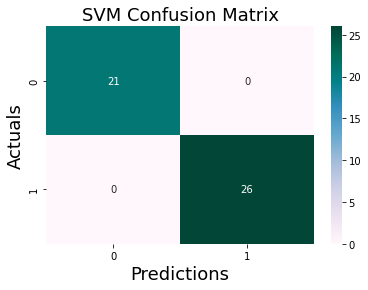

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        26

    accuracy                           1.00        47
   macro avg       1.00      1.00      1.00        47
weighted avg       1.00      1.00      1.00        47



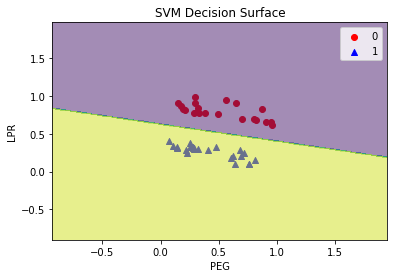

In [105]:
svm_1 = svm.SVC(kernel='linear',decision_function_shape="ovo", probability=True)
svm_1.fit(X1_train, y1_train)
y1_pred = svm_1.predict(X1_test)
print('Accuracy of svm_1: {:.2f}%'.format(accuracy_score(y1_test,y1_pred)))
y1_pred_proba = svm_1.predict_proba(X_test)

print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y1_test,y1_pred)
plot_binary_clasifier(np.array(X1_test),y1_pred,svm_1)

2.   Model (0,2) 


Accuracy of svm_2: 100.00%

Confusion Matrix OVO:

[[21  0]
 [ 0 22]]


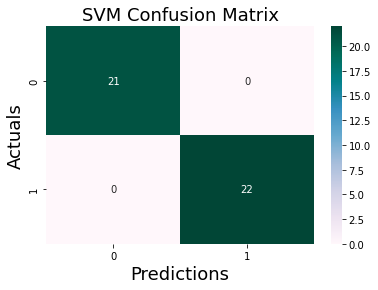

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



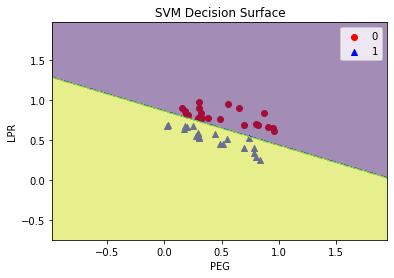

In [106]:
svm_2 = svm.SVC(kernel='linear',decision_function_shape="ovo",  probability=True)
svm_2.fit(X2_train, y2_train)
y2_pred = svm_2.predict(X2_test)
print('Accuracy of svm_2: {:.2f}%'.format(accuracy_score(y2_test,y2_pred)*100))
y2_pred_proba = svm_2.predict_proba(X_test)
print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y2_test,y2_pred)
plot_binary_clasifier(np.array(X2_test),y2_pred,svm_2)


3.   Model (0,3) 


Accuracy of svm_3: 100.00%

Confusion Matrix OVO:

[[21  0]
 [ 0 11]]


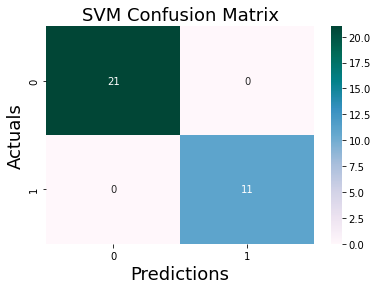

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        11

    accuracy                           1.00        32
   macro avg       1.00      1.00      1.00        32
weighted avg       1.00      1.00      1.00        32



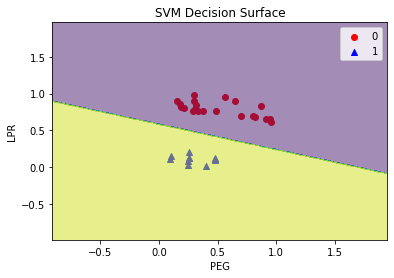

In [107]:
svm_3 = svm.SVC(kernel='linear',decision_function_shape="ovo",  probability=True)
svm_3.fit(X3_train, y3_train)
y3_pred = svm_3.predict(X3_test)
print('Accuracy of svm_3: {:.2f}%'.format(accuracy_score(y3_test,y3_pred)*100))
y3_pred_proba = svm_3.predict_proba(X_test)
print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y3_test,y3_pred)
plot_binary_clasifier(np.array(X3_test),y3_pred,svm_3)


4.   Model (1,2)  


Accuracy of svm_4: 95.83%

Confusion Matrix OVO:

[[26  0]
 [ 2 20]]


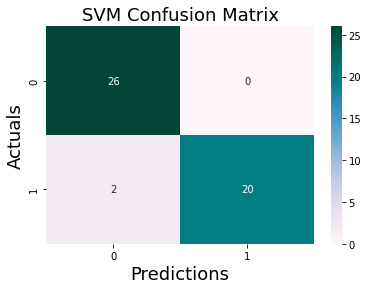

              precision    recall  f1-score   support

           0       0.93      1.00      0.96        26
           1       1.00      0.91      0.95        22

    accuracy                           0.96        48
   macro avg       0.96      0.95      0.96        48
weighted avg       0.96      0.96      0.96        48



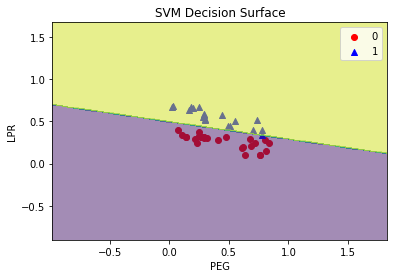

In [108]:
svm_4 = svm.SVC(kernel='linear',decision_function_shape="ovo",  probability=True)
svm_4.fit(X4_train, y4_train)
y4_pred = svm_4.predict(X4_test)
print('Accuracy of svm_4: {:.2f}%'.format(accuracy_score(y4_test,y4_pred)*100))
y4_pred_proba = svm_4.predict_proba(X_test)
print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y4_test,y4_pred)
plot_binary_clasifier(np.array(X4_test),y4_pred,svm_4)


5.   Model (1,3) 

Accuracy of svm_5: 86.49%

Confusion Matrix OVO:

[[26  0]
 [ 5  6]]


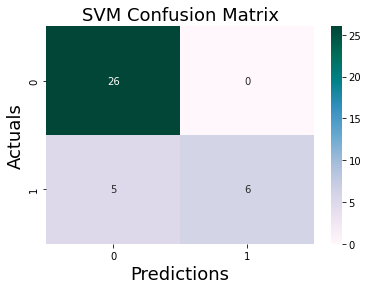

              precision    recall  f1-score   support

           0       0.84      1.00      0.91        26
           1       1.00      0.55      0.71        11

    accuracy                           0.86        37
   macro avg       0.92      0.77      0.81        37
weighted avg       0.89      0.86      0.85        37



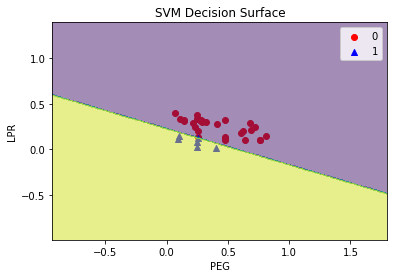

In [109]:
svm_5 = svm.SVC(kernel='linear',decision_function_shape="ovo",  probability=True)
svm_5.fit(X5_train, y5_train)
y5_pred = svm_5.predict(X5_test)
print('Accuracy of svm_5: {:.2f}%'.format(accuracy_score(y5_test,y5_pred)*100))
y5_pred_proba = svm_5.predict_proba(X_test)
print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y5_test,y5_pred)
plot_binary_clasifier(np.array(X5_test),y5_pred,svm_5)

6.   Model (2,3) 


Accuracy of svm_6: 100.00%

Confusion Matrix OVO:

[[22  0]
 [ 0 11]]


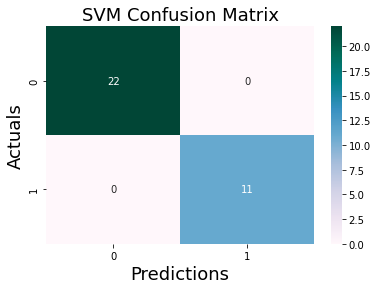

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        22
           1       1.00      1.00      1.00        11

    accuracy                           1.00        33
   macro avg       1.00      1.00      1.00        33
weighted avg       1.00      1.00      1.00        33



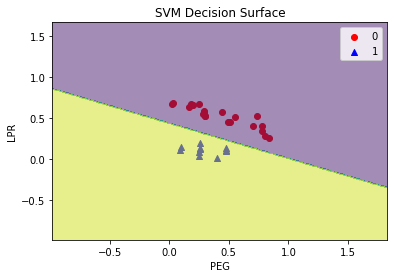

In [110]:
svm_6 = svm.SVC(kernel='linear',decision_function_shape="ovo",  probability=True)
svm_6.fit(X6_train, y6_train)
y6_pred = svm_6.predict(X6_test)
print('Accuracy of svm_6: {:.2f}%'.format(accuracy_score(y6_test,y6_pred)*100))
y6_pred_proba = svm_6.predict_proba(X_test)
print('\nConfusion Matrix OVO:\n')
confusion_matrix_binary_classes(y6_test,y6_pred)
plot_binary_clasifier(np.array(X6_test),y6_pred,svm_6)

# Obtain Argmax value to get the predicted label



1.   Use the mean to agregate the probabilities for each class


In [111]:
# 1(0,1) 2(0,2) 3(0,3)
mean_proba_0 = np.hstack((y1_pred_proba[:,0].reshape(-1,1), y2_pred_proba[:,0].reshape(-1,1), y3_pred_proba[:,0].reshape(-1,1))).mean(axis=1).reshape(-1,1)

# 1(0,1) 4(1,2) 5(1,3)
mean_proba_1 = np.hstack((y1_pred_proba[:,1].reshape(-1,1), y4_pred_proba[:,0].reshape(-1,1), y5_pred_proba[:,0].reshape(-1,1))).mean(axis=1).reshape(-1,1)

# 2(0,2) 4(1,2) 6(2,3)
mean_proba_2 = np.hstack((y2_pred_proba[:,1].reshape(-1,1), y4_pred_proba[:,1].reshape(-1,1), y6_pred_proba[:,0].reshape(-1,1))).mean(axis=1).reshape(-1,1)

# 3(0,3) 5(1,3) 6(2,3)
mean_proba_3 = np.hstack((y3_pred_proba[:,1].reshape(-1,1), y5_pred_proba[:,1].reshape(-1,1), y6_pred_proba[:,1].reshape(-1,1))).mean(axis=1).reshape(-1,1)




1.   Use the arrgmax to get the highest probability


In [112]:
yb_all = np.hstack((mean_proba_0, mean_proba_1, mean_proba_2, mean_proba_3))
y_pred_final = np.argmax(yb_all, axis=1)
y_pred_final

array([2, 2, 2, 3, 0, 0, 2, 0, 1, 2, 2, 1, 0, 3, 0, 1, 2, 0, 1, 2, 1, 1,
       2, 2, 2, 1, 2, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 3, 1, 1, 1, 0, 1, 2,
       1, 0, 1, 0, 3, 1, 2, 0, 1, 0, 1, 3, 1, 1, 2, 0, 0, 1, 3, 2, 3, 1,
       3, 3, 0, 1, 1, 1, 1, 2, 2, 2, 1, 3, 0, 1])

the final model accuracy :0.975

Confusion Matrix:

[[21  0  0  0]
 [ 0 26  0  0]
 [ 0  1 21  0]
 [ 0  1  0 10]]


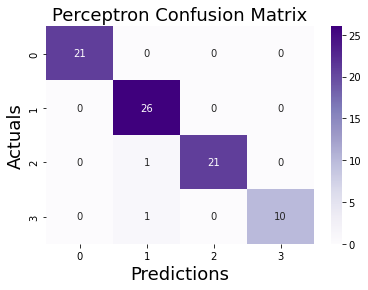

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       0.93      1.00      0.96        26
           2       1.00      0.95      0.98        22
           3       1.00      0.91      0.95        11

    accuracy                           0.97        80
   macro avg       0.98      0.97      0.97        80
weighted avg       0.98      0.97      0.98        80

number of accurate prediction points = 78
number of inaccurate prediction points = 2
accuracy = 97.5


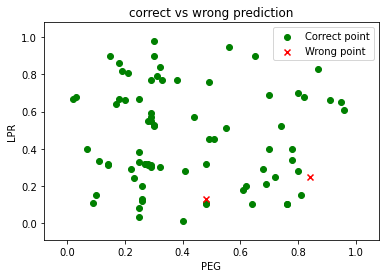

In [113]:
print(f"the final model accuracy :{accuracy_score(y_test,y_pred_final)}")
print('\nConfusion Matrix:\n')
print(confusion_matrix(y_test,y_pred_final ))
ax = sns.heatmap(confusion_matrix(y_test,y_pred_final ), annot=True, cmap='Purples')

plt.xlabel('Predictions', fontsize=18)
plt.ylabel('Actuals', fontsize=18)
plt.title('Perceptron Confusion Matrix', fontsize=18)
plt.show()
print(classification_report(y_test,y_pred_final))

plot_true_false(np.array(X_test),np.array(y_test), np.array(y_pred_final))